<a href="https://colab.research.google.com/github/vpolkampally0125/aaru/blob/main/Gate_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os, json, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
SEED = 42
N = 1000          # total rows
VAL_FRACTION = 0.2
PROC_DIR = "data/processed"
os.makedirs(PROC_DIR, exist_ok=True)

In [8]:
# determinism
random.seed(SEED)
np.random.seed(SEED)
with open(os.path.join(PROC_DIR, "seed.json"), "w") as f:
    json.dump({"seed": SEED}, f)

In [7]:
# synthetic dataset
target = np.random.randint(0, 3, size=N)
f1 = np.random.normal(loc=target * 0.6, scale=1.0, size=N)
f2 = np.random.normal(0, 1, size=N)
f3 = np.random.rand(N)
f4 = 0.7 * f1 + np.random.normal(0, 0.5, size=N)

In [10]:
# Data frame generation using Pandas
df = pd.DataFrame({"target": target, "f1": f1, "f2": f2, "f3": f3, "f4": f4})

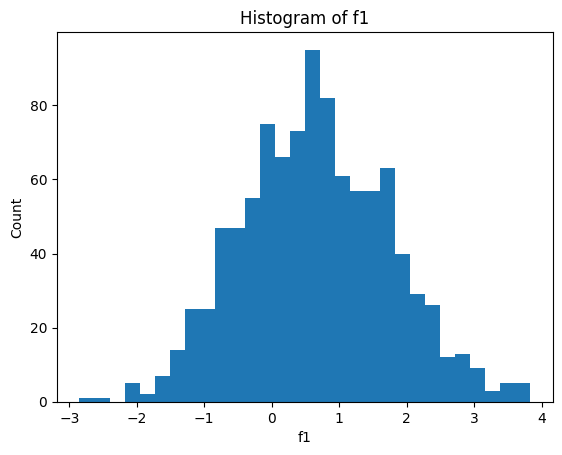

In [11]:
#Histogram showing how populous rows in f1 are. Also tells us about most popular target classes as f1 is 0.6 * target.
plt.hist(df["f1"], bins=30)
plt.title("Histogram of f1"); plt.xlabel("f1"); plt.ylabel("Count")
plt.show()

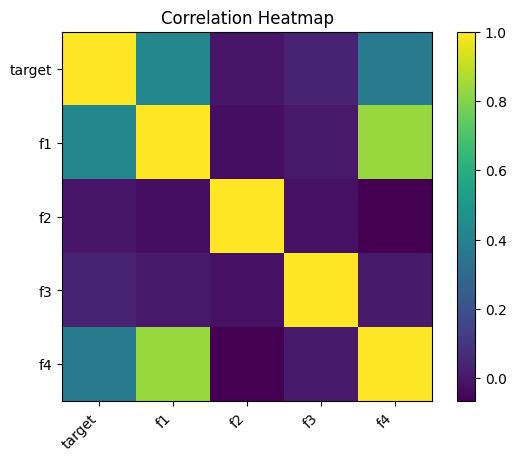

In [12]:
# Heatmap depicts correlation between all columns identifying collinearity between features (f1 and f4)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.imshow(df[num_cols].corr(), interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.show()

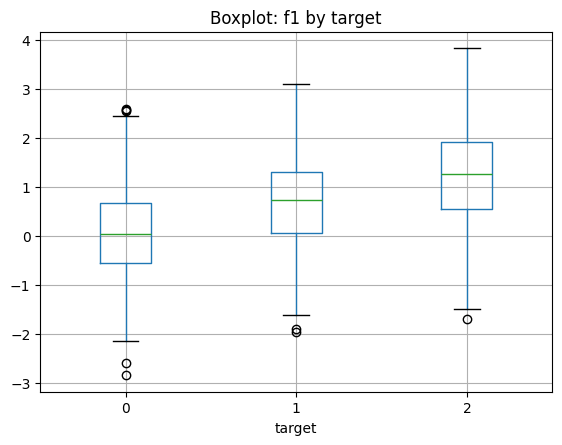

In [13]:
# Boxplot helps classify target due to f1 having been generated from target
df.boxplot(column="f1", by="target")
plt.title("Boxplot: f1 by target"); plt.suptitle("")
plt.show()